In [1]:
%matplotlib inline

In [2]:
# !pip install graphy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# import graphy

In [3]:
import community as cu

In [17]:
import pandas as pd

In [4]:
# graphy

# G = nx.karate_club_graph()
# qualityObj = graphy.qualityfuncs.Modularity(nx.to_numpy_matrix(G))
# best_membership, q = qualityObj.find_optimal()
# graphy.plotting.plot_graph(G, pos=nx.spring_layout(G), colors=best_membership)

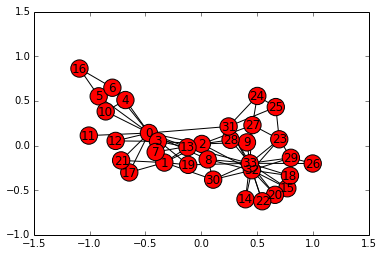

In [5]:
G = nx.karate_club_graph()
spring_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=spring_pos)
plt.show()

In [9]:
parts = cu.best_partition(G)
values = [parts.get(node) for node in G.nodes()]
values

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2]

In [7]:
print cu.__file__

/Users/bradt/Library/Python/2.7/lib/python/site-packages/community/__init__.pyc


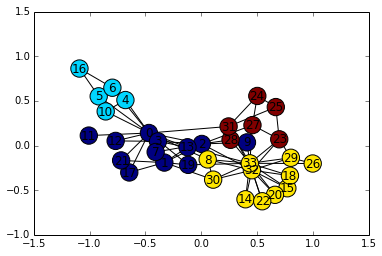

In [10]:
nx.draw_networkx(G, pos=spring_pos, node_color=values)
plt.show()

In [13]:
mod = cu.modularity(parts, G)
mod

0.4188034188034188

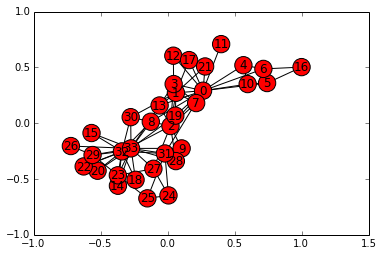

In [16]:
flarp = nx.to_numpy_matrix(G)
F = nx.from_numpy_matrix(flarp)

pas = nx.spring_layout(F)
nx.draw_networkx(G, pos=pas)
plt.show()

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 7, 73: 7, 74: 7, 75: 7, 76: 7, 77: 7, 78: 7, 79: 7, 80: 8, 81: 8, 82: 8, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8}


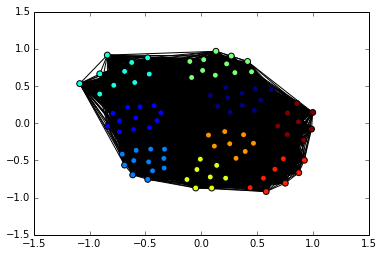

In [133]:
test_file="../test_10_exome_libraries.ep_affinity.csv"
distance = pd.read_csv(test_file, header=[0,1], index_col=[0,1])
D = nx.from_numpy_matrix(distance.values)
nx.info(D)
fas = nx.spring_layout(D)
parts = cu.best_partition(D)
values = [parts.get(node) for node in D.nodes()]

print parts
nx.draw_networkx(D, pos=fas, with_labels=False, node_color=values, node_size=35)


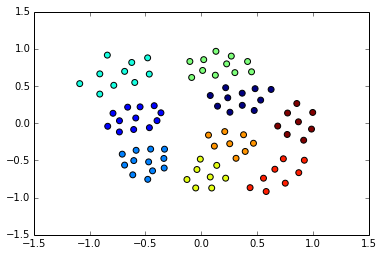

In [139]:
truth = distance.index.labels[1]
nx.draw_networkx_nodes(D, pos=fas, with_labels=False, node_color=truth, node_size=35)

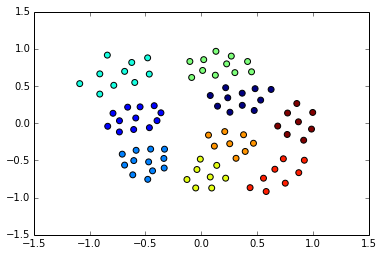

In [138]:
nx.draw_networkx_nodes(D, pos=fas, with_labels=False, node_color=values, node_size=35)


In [52]:
# Data reading and distance calculation utilities
def read_metadata(meta_file):
    with open(meta_file, 'r') as f:
        my_json = json.loads(f.read())
    return {json.loads(key): value for (key, value) in my_json.iteritems()}

def read_table(table_file):
    with open(table_file, 'r') as f:
        # This will initially read the keys in the k:v pairs as just strings
        my_json = json.loads(f.read())
    # Convert keys string->list; but cannot hash on a list, so conver to a tuple for use in the map
    return {tuple(json.loads(key)): value for (key, value) in my_json.iteritems()}

def get_groups_and_libraries(meta):
    groups = []
    libraries = []
    for key in meta.keys():
        libraries.append(meta[key]['mAttributes']['LB'])
        groups.append(meta[key]['mReadGroupId'])
    return (groups, libraries)

def package_and_sort(matrix, groups, libraries):
    arrays = [np.array(groups), np.array(libraries)]
#     df = pd.DataFrame(matrix, index=arrays, columns=arrays).sort_index(level=1).sort_index(level=1, axis=1)
    df = pd.DataFrame(matrix, index=arrays, columns=arrays).sortlevel(level=1).sortlevel(level=1, axis=1)
    df.index.names=["group", "library"]
    return df

In [38]:
cu.modularity(parts, D)

0.6177970073518393

In [87]:
distance.index.get_level_values(1)

Index([u'NexPond-542558', u'NexPond-542558', u'NexPond-542558',
       u'NexPond-542558', u'NexPond-542558', u'NexPond-542558',
       u'NexPond-542558', u'NexPond-542558', u'NexPond-542558',
       u'NexPond-542558', u'NexPond-542558', u'NexPond-544405',
       u'NexPond-544405', u'NexPond-544405', u'NexPond-544405',
       u'NexPond-544405', u'NexPond-544405', u'NexPond-544405',
       u'NexPond-544405', u'NexPond-544405', u'NexPond-544405',
       u'NexPond-544405', u'NexPond-544405', u'NexPond-544501',
       u'NexPond-544501', u'NexPond-544501', u'NexPond-544501',
       u'NexPond-544501', u'NexPond-544501', u'NexPond-544501',
       u'NexPond-544501', u'NexPond-544501', u'NexPond-544501',
       u'NexPond-544501', u'NexPond-544501', u'NexPond-546432',
       u'NexPond-546432', u'NexPond-546432', u'NexPond-546432',
       u'NexPond-546432', u'NexPond-546432', u'NexPond-546432',
       u'NexPond-546432', u'NexPond-546432', u'NexPond-546432',
       u'NexPond-546619', u'NexPond-5466

In [121]:
distance.index.get_level_values('library')[5]

'NexPond-542558'

In [123]:
import json

metadata_file = "../test_10_exome_libraries.read_groups.json"
meta = read_metadata(metadata_file)
groups, libraries = get_groups_and_libraries(meta)

# print set(parts.values())
# print len(set(libraries))

farp = [u'NexPond-542558', u'NexPond-544405', u'NexPond-544501', u'NexPond-546432', u'NexPond-546619', u'NexPond-554696', u'NexPond-554792', u'NexPond-558654', u'NexPond-558946']

for k in xrange(len(parts.values())):
    farp = distance.index.labels[1][k]
    print k,parts[k], meta[k]['mAttributes']['LB'], farp, distance.index.get_level_values(1)[k]


libs = distance.index.get_level_values('library')
print libs[3] == libs[5]
print parts[3] == parts[2]

0 0 NexPond-542558 0 NexPond-542558
1 0 NexPond-544405 0 NexPond-542558
2 0 NexPond-544405 0 NexPond-542558
3 0 NexPond-544405 0 NexPond-542558
4 0 NexPond-544405 0 NexPond-542558
5 0 NexPond-544405 0 NexPond-542558
6 0 NexPond-544405 0 NexPond-542558
7 0 NexPond-544405 0 NexPond-542558
8 0 NexPond-544405 0 NexPond-542558
9 0 NexPond-544501 0 NexPond-542558
10 0 NexPond-544501 0 NexPond-542558
11 1 NexPond-544501 1 NexPond-544405
12 1 NexPond-544501 1 NexPond-544405
13 1 NexPond-544501 1 NexPond-544405
14 1 NexPond-544501 1 NexPond-544405
15 1 NexPond-544501 1 NexPond-544405
16 1 NexPond-546432 1 NexPond-544405
17 1 NexPond-546432 1 NexPond-544405
18 1 NexPond-554792 1 NexPond-544405
19 1 NexPond-554792 1 NexPond-544405
20 1 NexPond-554696 1 NexPond-544405
21 1 NexPond-554696 1 NexPond-544405
22 1 NexPond-554696 1 NexPond-544405
23 2 NexPond-554696 2 NexPond-544501
24 2 NexPond-554696 2 NexPond-544501
25 2 NexPond-554696 2 NexPond-544501
26 2 NexPond-542558 2 NexPond-544501
27 2 NexPon

In [113]:
pd._version.version_json

'\n{\n "dirty": false,\n "error": null,\n "full-revisionid": "6c30cbecf8e5ae610f2a37ba821116bd9f77044d",\n "version": "0.17.1"\n}\n'

In [116]:
distance.columns.names=['group', 'library']
distance.xs('NexPond-558654', level='library', axis=1).xs('NexPond-558654', level='library', axis=0)

# distance.loc[:,(slice(None),'NexPond-558654')]

group,HWG5V.1,HWG5V.2,HWG5V.3,HWG5V.4,HWG5V.5,HWG5V.6,HWG5V.7,HWG5V.8
group,,,,,,,,
HWG5V.1,0.000000,0.224103,0.206138,0.204664,0.214727,0.221412,0.219036,0.222672
HWG5V.2,0.224103,0.000000,0.224712,0.221923,0.234262,0.240896,0.239899,0.244190
HWG5V.3,0.206138,0.224712,0.000000,0.203353,0.212355,0.220765,0.217342,0.225246
HWG5V.4,0.204664,0.221923,0.203353,0.000000,0.210301,0.217820,0.217364,0.222163
HWG5V.5,0.214727,0.234262,0.212355,0.210301,0.000000,0.230267,0.227863,0.233240
HWG5V.6,0.221412,0.240896,0.220765,0.217820,0.230267,0.000000,0.237076,0.239827
HWG5V.7,0.219036,0.239899,0.217342,0.217364,0.227863,0.237076,0.000000,0.237123
HWG5V.8,0.222672,0.244190,0.225246,0.222163,0.233240,0.239827,0.237123,0.000000


In [45]:
def is_greater_than(x, threshold):
    return 1 if x >= threshold else 0

apply_threshold = np.vectorize(is_greater_than)

threshold = 0.088175

result = apply_threshold(distance, threshold)

In [40]:
def plot_matrix(matrix, title='Matrix', vmax=None, ax=None):
    if ax is None:
        ax = plt.gca()
    n, m = matrix.shape
    
    colors = ax.pcolor(matrix, edgecolor='k', cmap = plt.cm.Blues, vmin=0, vmax=vmax)
    plt.colorbar(colors, ax=ax)
    ax.set_xticks(np.arange(n)+0.5)
    ax.set_yticks(np.arange(m)+0.5)
    ax.set_xticklabels(np.arange(n))
    ax.set_yticklabels(np.arange(m))
    ax.set_title(title)
    ax.invert_yaxis()

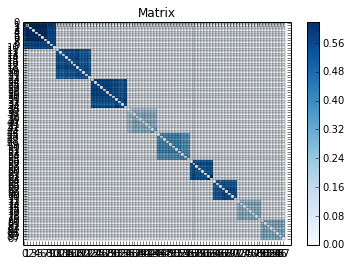

In [41]:
plot_matrix(distance)

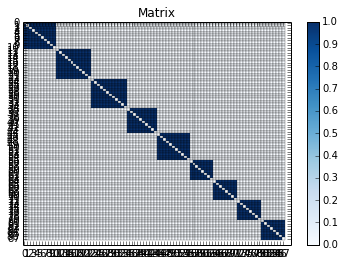

In [46]:
plot_matrix(result)

Name: 
Type: Graph
Number of nodes: 88
Number of edges: 399
Average degree:   9.0682
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 7, 73: 7, 74: 7, 75: 7, 76: 7, 77: 7, 78: 7, 79: 7, 80: 8, 81: 8, 82: 8, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8}


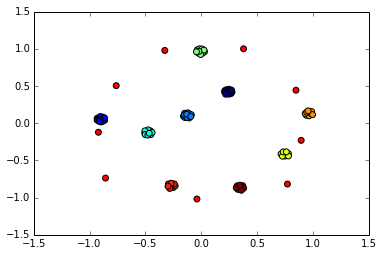

In [124]:
R = nx.from_numpy_matrix(result)
print nx.info(R)
fas = nx.spring_layout(R)
parts = cu.best_partition(R)
values = [parts.get(node) for node in R.nodes()]

print parts
nx.draw_networkx(R, pos=fas, with_labels=False, node_color=values, node_size=35)


C = nx.make_max_clique_graph(R)
cas = nx.spring_layout(C)
nx.draw_networkx(C, pos=cas, with_labels=False, node_size=35)

AttributeError: 'dict' object has no attribute 'nodes'